In [296]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from itertools import combinations
from collections import Counter


# Set some plotting styles (optional but nice for EDA)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the Excel file
excel_file = 'pizzas_combos.xlsx'

# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(excel_file, sheet_name=None)

# Print all sheet names
print("Available Sheets:")
for sheet_name in sheets_dict:
    print(f"- {sheet_name}")

# Preview each sheet and run basic exploratory info
for name, df in sheets_dict.items():
    print(f"\n--- Exploring Sheet: {name} ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nData Types:")
    print(df.dtypes)
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    print("\nMissing Values:")
    print(df.isnull().sum())


Available Sheets:
- pizzas
- pizza_types
- order_details
- orders

--- Exploring Sheet: pizzas ---
Shape: (96, 4)
Columns: ['pizza_id', 'pizza_type_id', 'size', 'price']

Data Types:
pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object

First 5 rows:
     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75

Summary Statistics:
         pizza_id pizza_type_id size      price
count          96            96   96  96.000000
unique         96            32    5        NaN
top     bbq_ckn_s     the_greek    S        NaN
freq            1             5   32        NaN
mean          NaN           NaN  NaN  16.440625
std           NaN           NaN  NaN   4.090266
min           NaN           NaN  NaN   9.750000
25%           NaN           NaN  NaN  12.50

###  📌1. What is the total revenue/sales?

Missing prices in merged data: 0
Total Revenue: $817,860.05


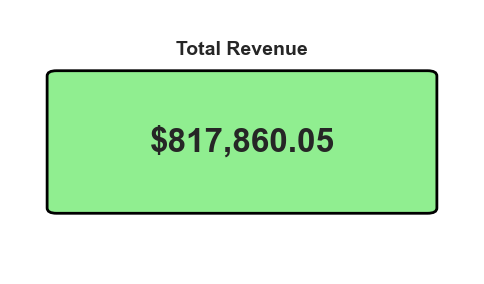

In [298]:
# Merge order_details with pizzas to get price info
order_data_with_price = sheets_dict['order_details'].merge(
    sheets_dict['pizzas'][['pizza_id', 'price']],
    on='pizza_id',
    how='left'
)

missing_prices = order_data_with_price['price'].isnull().sum()
print(f"Missing prices in merged data: {missing_prices}")

# Calculate revenue for each row
order_data_with_price['revenue'] = order_data_with_price['price'] * order_data_with_price['quantity']

# Total revenue
total_revenue = order_data_with_price['revenue'].sum()

print(f"Total Revenue: ${total_revenue:,.2f}")



fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')

# Draw a box
box = FancyBboxPatch(
    (0.1, 0.25), 0.8, 0.5,
    boxstyle="round,pad=0.02",
    edgecolor="black",
    facecolor="#90EE90",  # light green background
    linewidth=2
)
ax.add_patch(box)

# Add text inside the box
ax.text(0.5, 0.5, f"${total_revenue:,.2f}", fontsize=24, ha='center', va='center', fontweight='bold')

# Add title above the box
ax.text(0.5, 0.83, "Total Revenue", ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 📌2. Find the total quantity sold



Total Quantity Sold: 49574


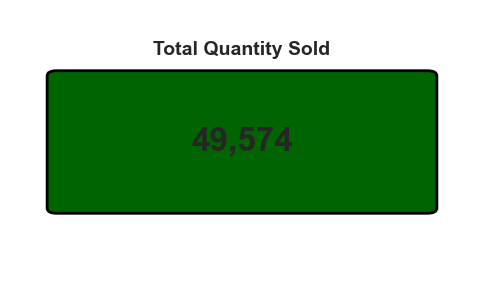

In [300]:
total_quantity = order_data['quantity'].sum()
print(f"Total Quantity Sold: {total_quantity}")

total_quantity = order_data['quantity'].sum()

fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')

box = FancyBboxPatch((0.1, 0.25), 0.8, 0.5, boxstyle="round,pad=0.02",
                     edgecolor="black", facecolor="#006400", linewidth=2)
ax.add_patch(box)

ax.text(0.5, 0.5, f"{total_quantity:,}", fontsize=24, ha='center', va='center', fontweight='bold')
ax.text(0.5, 0.83, "Total Quantity Sold", ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### 📌 3. Find the total orders

Total Orders: 21350


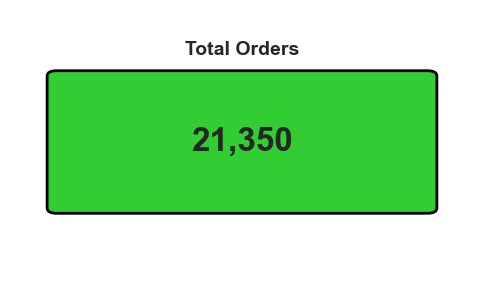

In [302]:
total_orders = sheets_dict['orders']['order_id'].nunique()
print(f"Total Orders: {total_orders}")

fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')

box = FancyBboxPatch((0.1, 0.25), 0.8, 0.5, boxstyle="round,pad=0.02",
                     edgecolor="black", facecolor="#32CD32", linewidth=2)
ax.add_patch(box)

ax.text(0.5, 0.5, f"{total_orders:,}", fontsize=24, ha='center', va='center', fontweight='bold')
ax.text(0.5, 0.83, "Total Orders", ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 📌 4. How many pizza types do they sell?

Total Pizza Types: 32


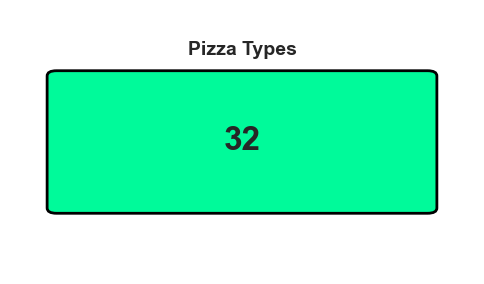

In [304]:
total_pizza_types = sheets_dict['pizza_types']['pizza_type_id'].nunique()
print(f"Total Pizza Types: {total_pizza_types}")

fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')

box = FancyBboxPatch((0.1, 0.25), 0.8, 0.5, boxstyle="round,pad=0.02",
                     edgecolor="black", facecolor="#00FA9A", linewidth=2)
ax.add_patch(box)

ax.text(0.5, 0.5, f"{total_pizza_types}", fontsize=24, ha='center', va='center', fontweight='bold')
ax.text(0.5, 0.83, "Pizza Types", ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 📌 5. Find the average price of the pizzas

Average Pizza Price: $16.44


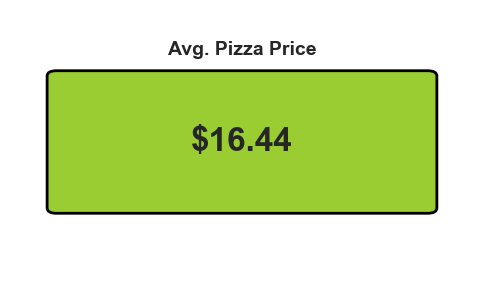

In [306]:
average_price = sheets_dict['pizzas']['price'].mean()
print(f"Average Pizza Price: ${average_price:.2f}")

fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')

box = FancyBboxPatch((0.1, 0.25), 0.8, 0.5, boxstyle="round,pad=0.02",
                     edgecolor="black", facecolor="#9ACD32", linewidth=2)
ax.add_patch(box)

ax.text(0.5, 0.5, f"${average_price:.2f}", fontsize=24, ha='center', va='center', fontweight='bold')
ax.text(0.5, 0.83, "Avg. Pizza Price", ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 📌 6. What are the peak hours of sales?

Orders by Hour:
hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: count, dtype: int64


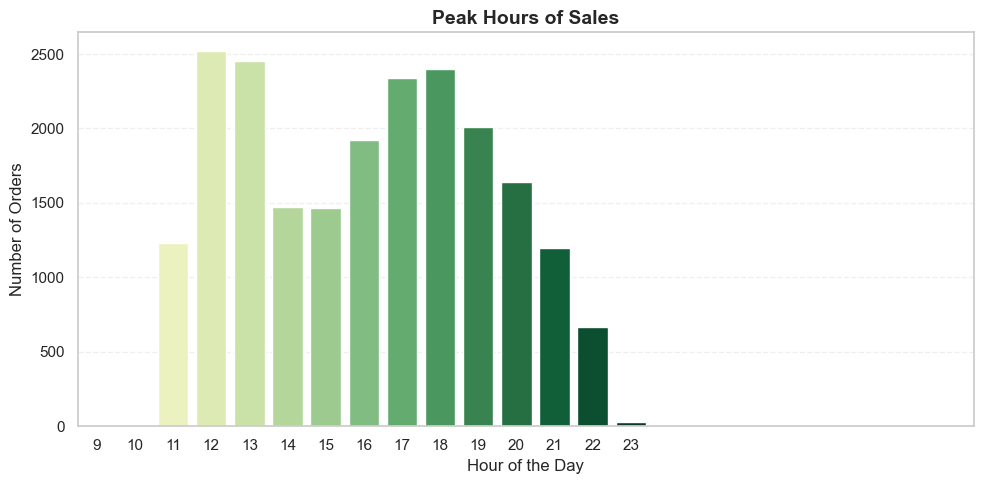

In [308]:
# Extract hour from time column
orders = sheets_dict['orders'].copy()
orders['hour'] = pd.to_datetime(orders['time'], format='%H:%M:%S').dt.hour

# Count orders per hour
peak_hours = orders['hour'].value_counts().sort_index()
print("Orders by Hour:")
print(peak_hours)

# Ensure 'time' column is in string format
orders['time'] = orders['time'].astype(str)

# Extract the hour from the 'time' column
orders['hour'] = orders['time'].str[:2].astype(int)

# Count the orders per hour
hourly_sales = orders['hour'].value_counts().sort_index()

# Plot the data with 'hue' set to 'x' and legend turned off
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, hue=hourly_sales.index, palette="YlGn", legend=False)
plt.title("Peak Hours of Sales", fontsize=14, fontweight='bold')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### 📌 7. Find the total sales made on each day of the week
Also, identify the day with the highest sales.




Sales by Day of the Week:
day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64

Top Sales Day: Friday with $136,073.90


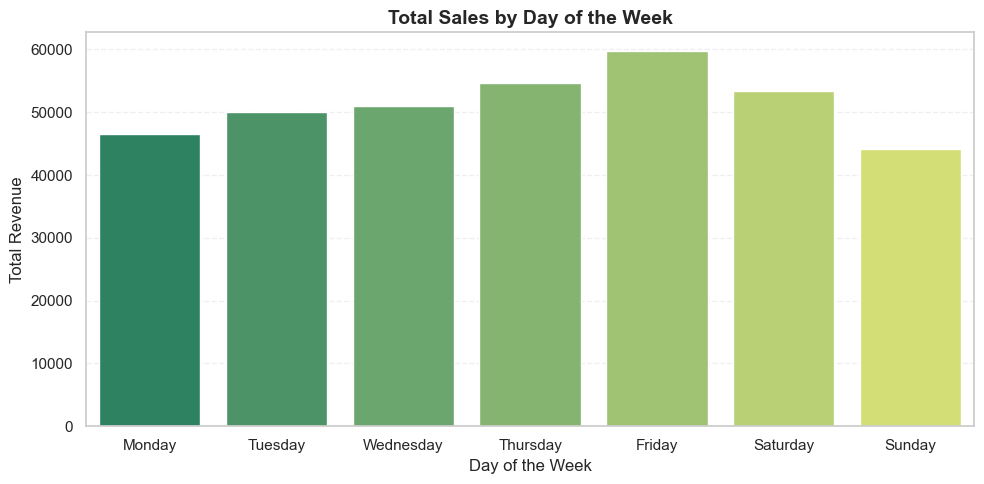

In [310]:
# Merge orders with order_details and price
orders_with_details = sheets_dict['orders'].merge(
    order_data,
    on='order_id',
    how='left'
)

# Extract day of the week
orders_with_details['day_of_week'] = orders_with_details['date'].dt.day_name()

# Group by day and sum revenue
sales_by_day = orders_with_details.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)

print("Sales by Day of the Week:")
print(sales_by_day)
print(f"\nTop Sales Day: {sales_by_day.idxmax()} with ${sales_by_day.max():,.2f}")



orders['day_of_week'] = orders['date'].dt.day_name()
weekday_sales = order_data.groupby(orders['day_of_week'])['revenue'].sum()

# Reorder by week
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, hue=weekday_sales.index, palette="summer", legend=False)
plt.title("Total Sales by Day of the Week", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### 📌 8. Find the top 5 bestselling pizzas

Top 5 Bestselling Pizzas:
pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
Name: quantity, dtype: int64


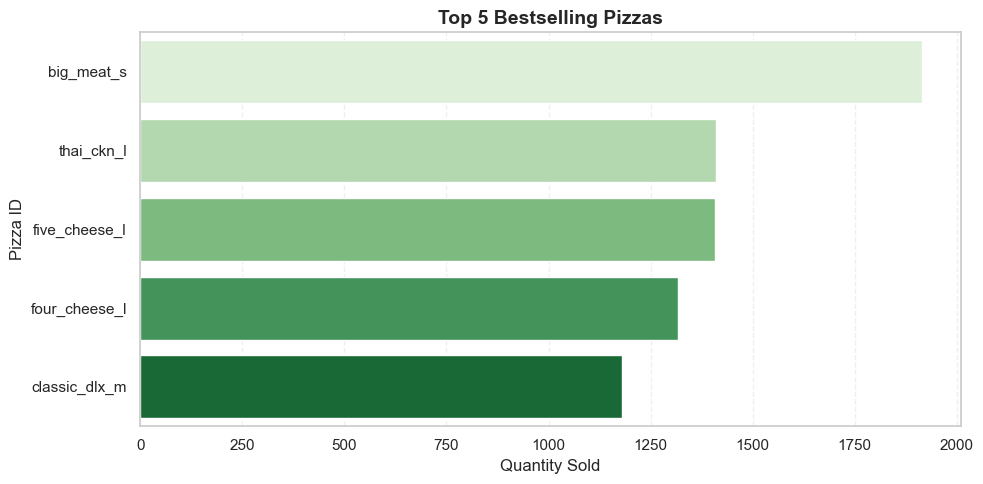

In [312]:
bestsellers = order_data.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Bestselling Pizzas:")
print(bestsellers)

top5_pizzas = order_data.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).head(5)

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=top5_pizzas.values, y=top5_pizzas.index, hue=top5_pizzas.index, palette="Greens", legend=False)
plt.title("Top 5 Bestselling Pizzas", fontsize=14, fontweight='bold')  # Removed the trophy emoji
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza ID")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### 📌 9. Find the sales made in each month. Any trend noticeable?



Monthly Sales:
month
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: revenue, dtype: float64


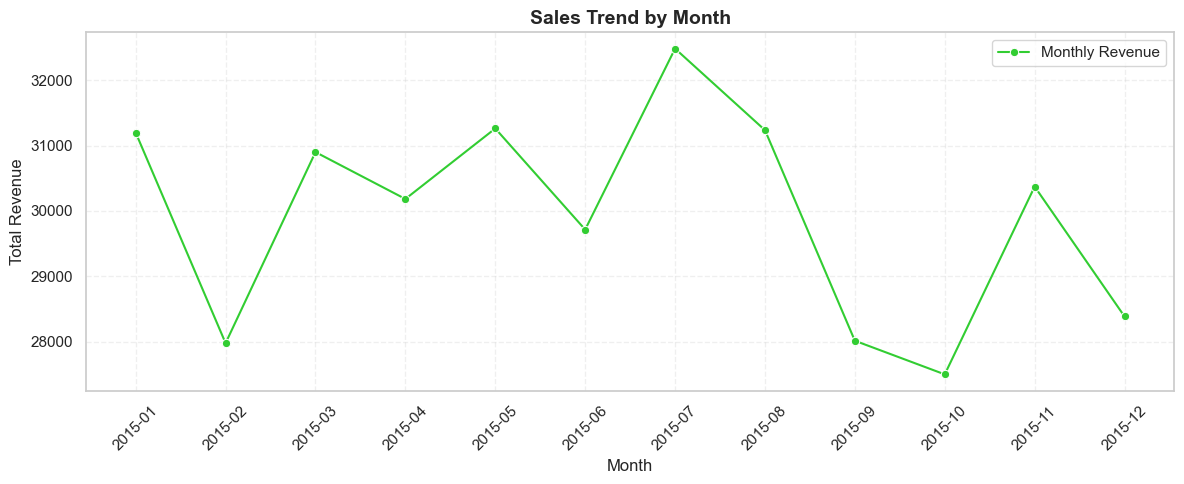

In [314]:
# Extract month
orders_with_details['month'] = orders_with_details['date'].dt.to_period('M')

# Group by month and sum revenue
monthly_sales = orders_with_details.groupby('month')['revenue'].sum().sort_index()

print("Monthly Sales:")
print(monthly_sales)



orders['month'] = orders['date'].dt.to_period('M').astype(str)
monthly_sales = order_data.groupby(orders['month'])['revenue'].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='limegreen', label="Monthly Revenue")
plt.title("Sales Trend by Month", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### 📌 10. Are there pizza types that are not doing well on the menu?

Low-Selling Pizzas (Bottom 5):
pizza_id
the_greek_xxl      28
green_garden_l     95
ckn_alfredo_s      96
calabrese_s        99
mexicana_s        162
Name: quantity, dtype: int64


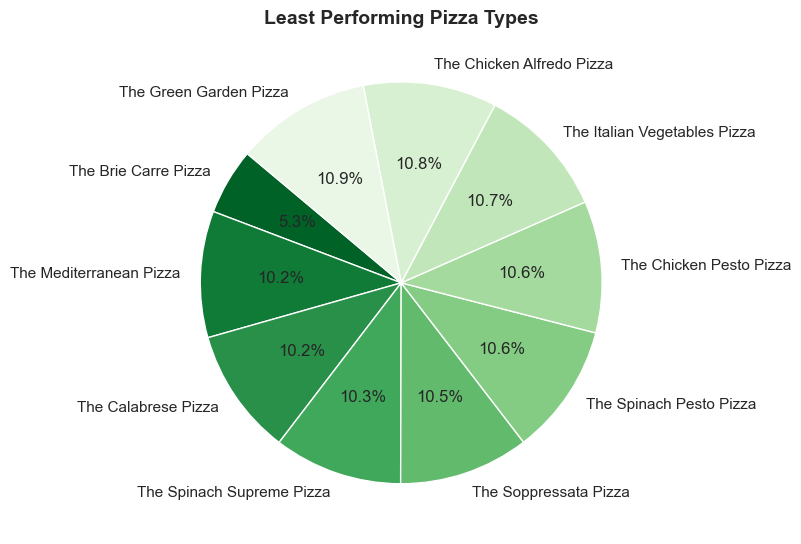

In [316]:
# Total quantity sold per pizza type
pizza_sales = order_data.groupby('pizza_id')['quantity'].sum()

# Identify low-selling pizzas (e.g., bottom 5)
low_sellers = pizza_sales.sort_values().head(5)
print("Low-Selling Pizzas (Bottom 5):")
print(low_sellers)

# Total quantity sold per pizza type
merged_pizza = order_data.merge(sheets_dict['pizzas'], on='pizza_id') \
                         .merge(sheets_dict['pizza_types'], on='pizza_type_id')
type_sales = merged_pizza.groupby('name')['quantity'].sum().sort_values(ascending=True)

# Bottom 10
bottom_10 = type_sales.head(10)

plt.figure(figsize=(8, 8))
colors = sns.color_palette("Greens_r", n_colors=10)
plt.pie(bottom_10, labels=bottom_10.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Least Performing Pizza Types", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## GOING CRAZY

## 📊 SALES & PERFORMANCE INSIGHTS

### 1. 🍕 Which pizza size generates the most revenue?

Revenue by Pizza Size:
size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: revenue, dtype: float64


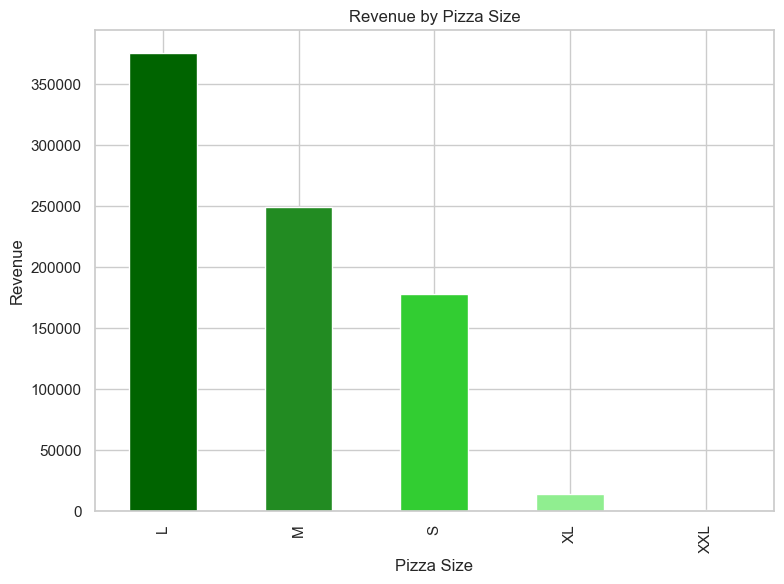

In [320]:
# Merge order_data with pizzas to get the 'size' column
order_with_size = order_data.merge(sheets_dict['pizzas'][['pizza_id', 'size']], on='pizza_id', how='left')

# Group by size and sum revenue
size_revenue = order_with_size.groupby('size')['revenue'].sum().sort_values(ascending=False)

print("Revenue by Pizza Size:")
print(size_revenue)

# Create bar chart with shades of green
size_revenue.plot(kind='bar', color=['#006400', '#228B22', '#32CD32', '#90EE90'], figsize=(8, 6))
plt.title('Revenue by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

### 2. 🍽️ Revenue contribution by pizza category

Revenue by Pizza Category:
category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: revenue, dtype: float64


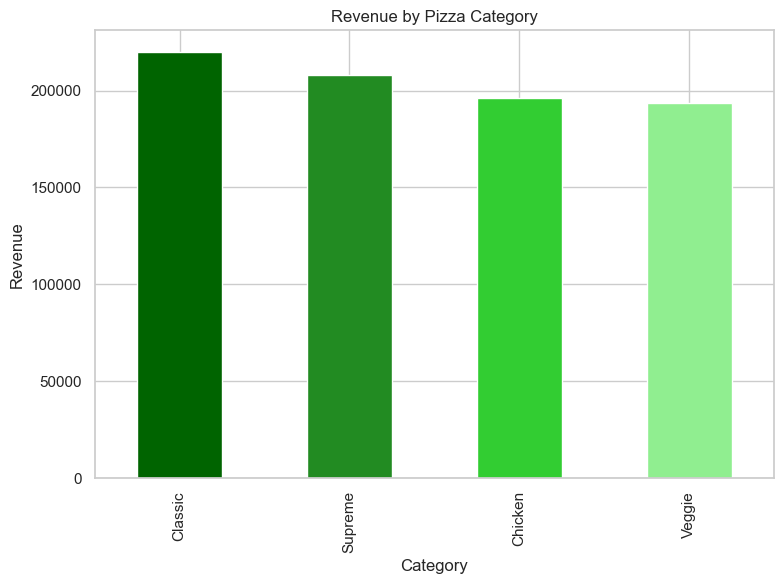

In [322]:
# Merge order_data with pizza_types to get category
pizza_info = sheets_dict['pizzas'].merge(sheets_dict['pizza_types'], on='pizza_type_id')
order_full = order_data.merge(pizza_info[['pizza_id', 'category']], on='pizza_id', how='left')

category_revenue = order_full.groupby('category')['revenue'].sum().sort_values(ascending=False)
print("Revenue by Pizza Category:")
print(category_revenue)

# Create bar chart with shades of green
category_revenue.plot(kind='bar', color=['#006400', '#228B22', '#32CD32', '#90EE90'], figsize=(8, 6))
plt.title('Revenue by Pizza Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


### 3. 📦 Average order size (number of pizzas per order)

Average Order Size: 2.32 pizzas per order


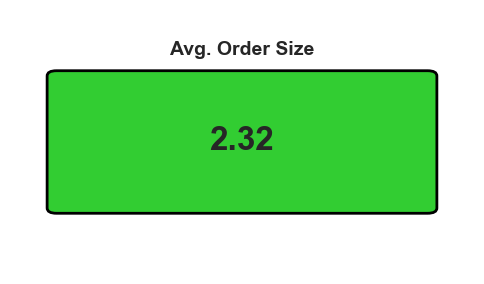

In [324]:
# Calculate average order size
avg_order_size = order_data.groupby('order_id')['quantity'].sum().mean()
print(f"Average Order Size: {avg_order_size:.2f} pizzas per order")

# Create card visual
fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')

# Add rounded box with green background and black border
box = FancyBboxPatch((0.1, 0.25), 0.8, 0.5, boxstyle="round,pad=0.02",
                     edgecolor="black", facecolor="#32CD32", linewidth=2)
ax.add_patch(box)

# Add text for the metric and title
ax.text(0.5, 0.5, f"{avg_order_size:.2f}", fontsize=24, ha='center', va='center', fontweight='bold')
ax.text(0.5, 0.83, "Avg. Order Size", ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 4. 💰 Average revenue per order

Average Revenue per Order: $38.31


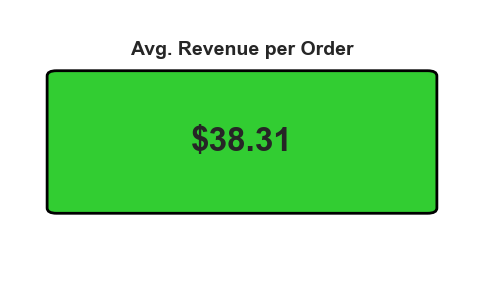

In [326]:
# Calculate average revenue per order
avg_order_revenue = order_data.groupby('order_id')['revenue'].sum().mean()
print(f"Average Revenue per Order: ${avg_order_revenue:.2f}")

# Create card visual
fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')

# Add rounded box with green background and black border
box = FancyBboxPatch((0.1, 0.25), 0.8, 0.5, boxstyle="round,pad=0.02",
                     edgecolor="black", facecolor="#32CD32", linewidth=2)
ax.add_patch(box)

# Add text for the metric and title
ax.text(0.5, 0.5, f"${avg_order_revenue:.2f}", fontsize=24, ha='center', va='center', fontweight='bold')
ax.text(0.5, 0.83, "Avg. Revenue per Order", ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 5. 📆 Day of week with highest avg revenue per order

Average Revenue per Order by Day of Week:
             avg_revenue_per_order
day_of_week                       
Saturday                 39.006460
Friday                   38.460684
Monday                   38.414298
Tuesday                  38.390111
Thursday                 38.137851
Wednesday                37.833466
Sunday                   37.806212


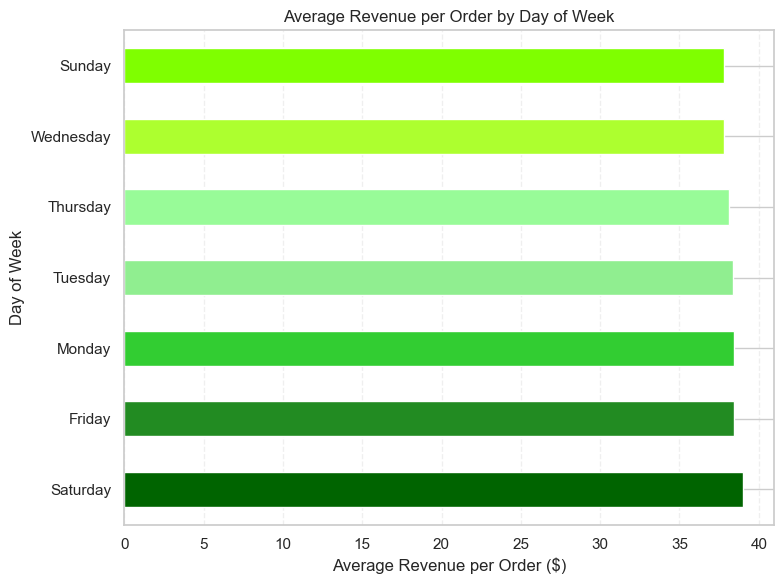

In [328]:
# Calculate daily average revenue per order
daily_avg_revenue = orders_with_details.groupby('day_of_week').agg(
    total_revenue=('revenue', 'sum'),
    total_orders=('order_id', 'nunique')
)
daily_avg_revenue['avg_revenue_per_order'] = daily_avg_revenue['total_revenue'] / daily_avg_revenue['total_orders']
daily_avg_revenue = daily_avg_revenue.sort_values('avg_revenue_per_order', ascending=False)

print("Average Revenue per Order by Day of Week:")
print(daily_avg_revenue[['avg_revenue_per_order']])

# Create horizontal bar chart with shades of green
fig, ax = plt.subplots(figsize=(8, 6))
daily_avg_revenue['avg_revenue_per_order'].plot(kind='barh', 
                                              color=['#006400', '#228B22', '#32CD32', '#90EE90', '#98FB98', '#ADFF2F', '#7FFF00'],
                                              ax=ax)

# Customize chart
plt.title('Average Revenue per Order by Day of Week')
plt.xlabel('Average Revenue per Order ($)')
plt.ylabel('Day of Week')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)  # Faint grid lines
plt.tight_layout()

plt.show()

## 📈 TREND & SEASONAL ANALYSIS

### 6. 📅 Monthly trend by pizza category

Monthly Sales by Category:
category   Chicken   Classic   Supreme    Veggie
month                                           
2015-01   16188.75  18619.40  17929.75  17055.40
2015-02   15468.25  17336.10  16718.85  15636.40
2015-03   17625.50  18116.60  17319.65  17335.35
2015-04   16473.00  18816.80  17643.55  15803.45
2015-05   16752.25  19423.10  18315.65  16911.75
2015-06   16086.50  18035.90  18097.25  16010.55
2015-07   17002.25  19653.00  18216.85  17685.80
2015-08   16352.50  18821.90  17093.45  16010.40
2015-09   16039.00  17832.85  15295.60  15012.60
2015-10   14792.00  17409.15  17275.10  14551.35
2015-11   17399.75  18585.60  18202.80  16207.20
2015-12   15739.75  17402.70  16088.50  15470.20


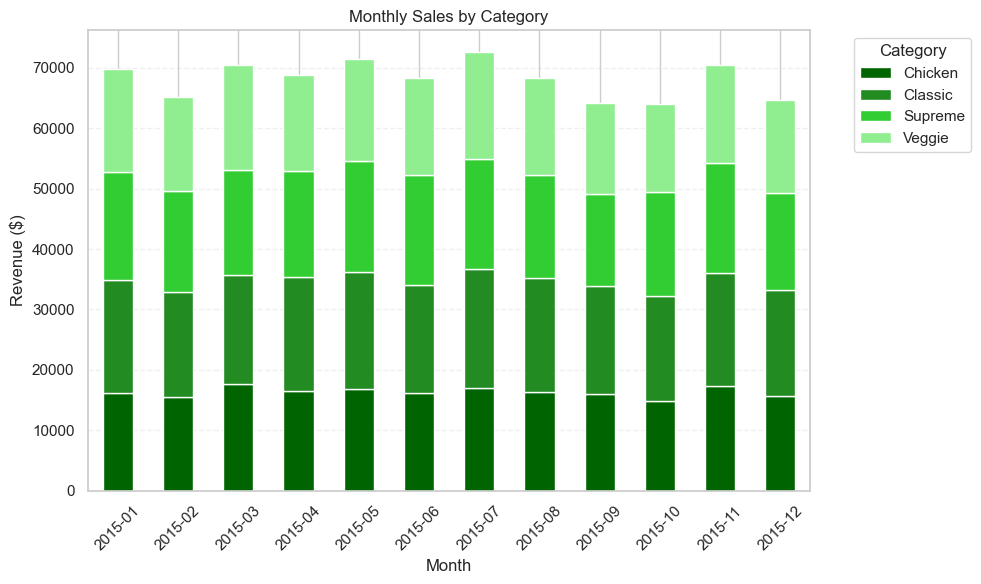

In [331]:
# Create month column and group by month and category
order_full['month'] = orders_with_details['date'].dt.to_period('M')
category_monthly = order_full.groupby(['month', 'category'])['revenue'].sum().unstack().fillna(0)
print("Monthly Sales by Category:")
print(category_monthly)

# Create stacked bar chart with shades of green
fig, ax = plt.subplots(figsize=(10, 6))
category_monthly.plot(kind='bar', stacked=True, 
                     color=['#006400', '#228B22', '#32CD32', '#90EE90'],  # Shades of green
                     ax=ax)

# Customize chart
plt.title('Monthly Sales by Category')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)  # Faint grid lines
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


### 7. 🗓️ Weekend vs. weekday performance

Revenue: Weekday vs Weekend
is_weekend
Weekday    595474.15
Weekend    222385.90
Name: revenue, dtype: float64


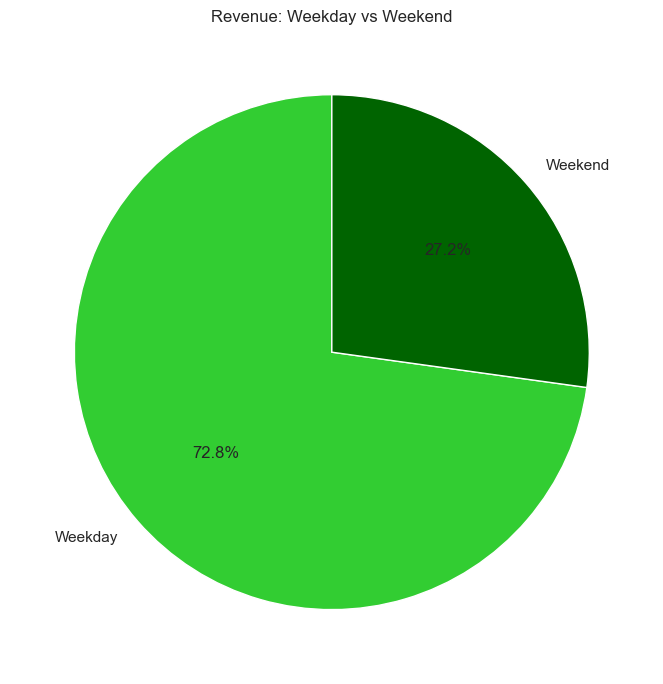

In [333]:
# Create is_weekend column and group by it
orders_with_details['is_weekend'] = orders_with_details['date'].dt.dayofweek >= 5  # Saturday = 5, Sunday = 6
weekend_perf = orders_with_details.groupby('is_weekend')['revenue'].sum()
weekend_perf = weekend_perf.rename({False: 'Weekday', True: 'Weekend'})
print("Revenue: Weekday vs Weekend")
print(weekend_perf)

# Create pie chart with shades of green
fig, ax = plt.subplots(figsize=(7, 7))
weekend_perf.plot(kind='pie', 
                 colors=['#32CD32', '#006400'],  # Shades of green
                 autopct='%1.1f%%',  # Show percentages
                 startangle=90,  # Rotate for better orientation
                 ax=ax)

# Customize chart
plt.title('Revenue: Weekday vs Weekend')
plt.ylabel('')  # Remove y-label for cleaner look
plt.tight_layout()

plt.show()


### 8. 🕰️ Low-performing hours

Hourly Revenue (lowest first):
hour
9         83.00
10       303.65
23      1121.35
22     22815.15
21     42029.80
11     44935.80
15     52992.30
20     58215.40
14     59201.40
16     70055.40
19     72628.90
17     86237.45
18     89296.85
13    106065.70
12    111877.90
Name: revenue, dtype: float64


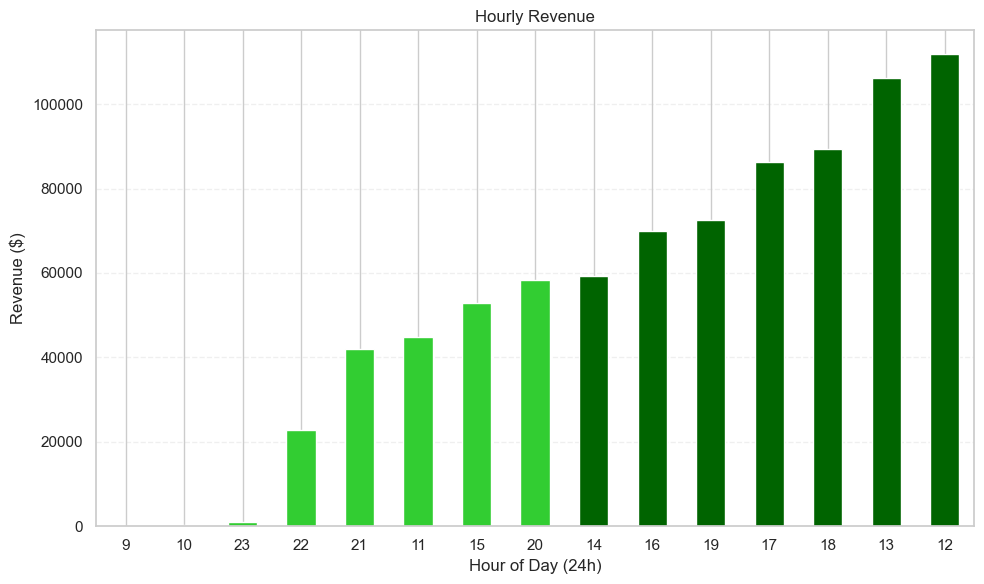

In [335]:
# Extract hour from time and group by hour
orders_with_details['hour'] = pd.to_datetime(orders_with_details['time'], format='%H:%M:%S').dt.hour
hourly_revenue = orders_with_details.groupby('hour')['revenue'].sum().sort_values()
print("Hourly Revenue (lowest first):")
print(hourly_revenue)

# Create bar chart with shades of green
fig, ax = plt.subplots(figsize=(10, 6))
hourly_revenue.plot(kind='bar', 
                    color=[f'#32CD32' if i < len(hourly_revenue)/2 else '#006400' for i in range(len(hourly_revenue))],  # Gradient-like green shades
                    ax=ax)

# Customize chart
plt.title('Hourly Revenue')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Revenue ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)  # Faint grid lines
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## 🧾 MENU OPTIMIZATION


### 9. ⚖️ Price vs demand (high price, low sales)

Top 5 Price-to-Demand Mismatches:
                quantity  price  price_per_quantity
pizza_id                                           
the_greek_xxl         28  35.95            1.283929
green_garden_l        95  20.25            0.213158
ckn_alfredo_s         96  12.75            0.132812
calabrese_s           99  12.25            0.123737
ital_veggie_l        190  21.00            0.110526


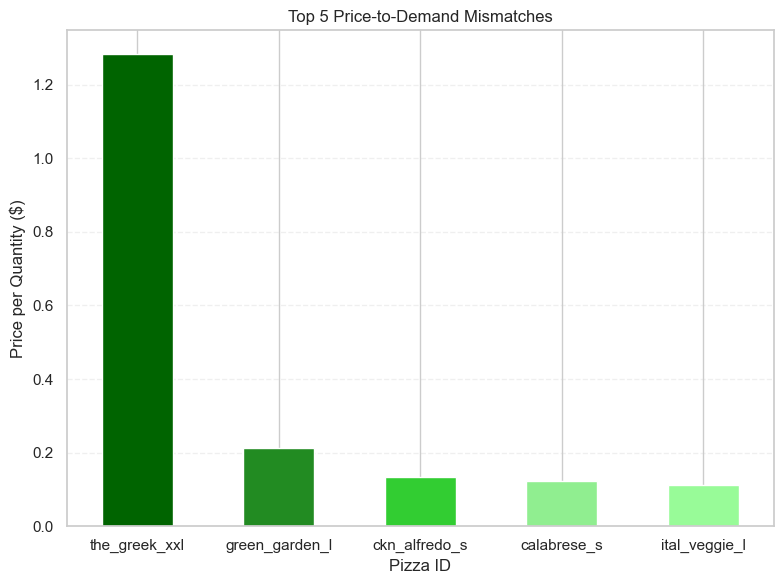

In [338]:
# Calculate price-to-demand mismatches
pizza_sales = order_data.groupby('pizza_id').agg({
    'quantity': 'sum',
    'price': 'mean'
})
pizza_sales['price_per_quantity'] = pizza_sales['price'] / pizza_sales['quantity']
mismatch = pizza_sales.sort_values(by='price_per_quantity', ascending=False).head(5)

print("Top 5 Price-to-Demand Mismatches:")
print(mismatch)

# Create bar chart with shades of green
fig, ax = plt.subplots(figsize=(8, 6))
mismatch['price_per_quantity'].plot(kind='bar', 
                                   color=['#006400', '#228B22', '#32CD32', '#90EE90', '#98FB98'],  # Shades of green
                                   ax=ax)

# Customize chart
plt.title('Top 5 Price-to-Demand Mismatches')
plt.xlabel('Pizza ID')
plt.ylabel('Price per Quantity ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)  # Faint grid lines
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### 10. 🧩 Pizzas often ordered together (simple combo analysis)


In [340]:
from itertools import combinations
from collections import Counter

# Get pizzas per order
grouped_orders = order_data.groupby('order_id')['pizza_id'].apply(list)

# Count pairs
pair_counts = Counter()

for pizzas in grouped_orders:
    unique_pizzas = set(pizzas)
    if len(unique_pizzas) > 1:
        for combo in combinations(sorted(unique_pizzas), 2):
            pair_counts[combo] += 1

# Show most frequent combos
top_combos = pair_counts.most_common(5)
print("Top 5 Frequent Pizza Combos:")
for combo, count in top_combos:
    print(f"{combo[0]} + {combo[1]}: {count} orders")


Top 5 Frequent Pizza Combos:
big_meat_s + thai_ckn_l: 144 orders
big_meat_s + four_cheese_l: 126 orders
big_meat_s + five_cheese_l: 125 orders
big_meat_s + classic_dlx_m: 105 orders
big_meat_s + spicy_ital_l: 104 orders


Top 5 Frequent Pizza Combos:
big_meat_s + thai_ckn_l: 144 orders
big_meat_s + four_cheese_l: 126 orders
big_meat_s + five_cheese_l: 125 orders
big_meat_s + classic_dlx_m: 105 orders
big_meat_s + spicy_ital_l: 104 orders


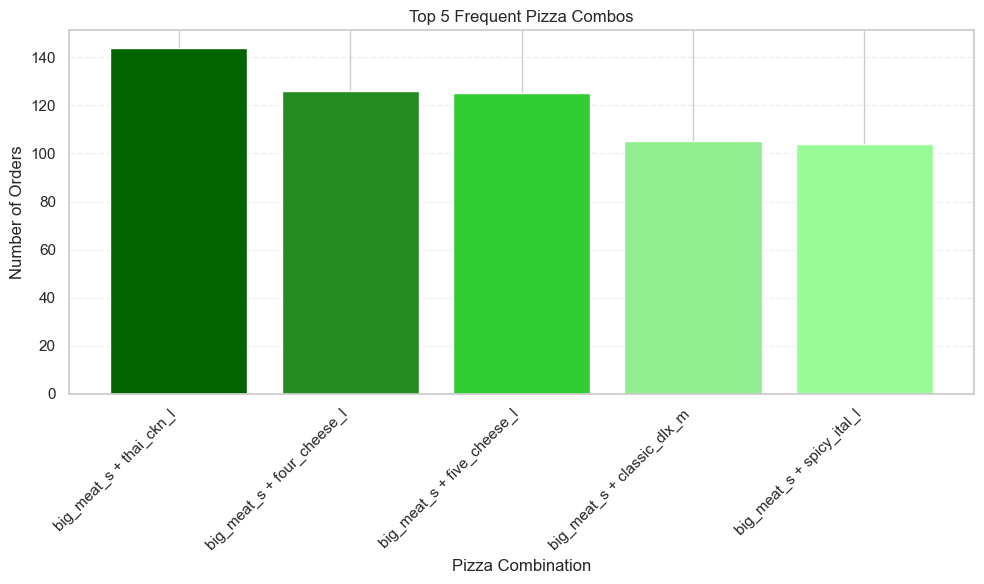

In [341]:
# Get pizzas per order
grouped_orders = order_data.groupby('order_id')['pizza_id'].apply(list)

# Count pairs
pair_counts = Counter()

for pizzas in grouped_orders:
    unique_pizzas = set(pizzas)
    if len(unique_pizzas) > 1:
        for combo in combinations(sorted(unique_pizzas), 2):
            pair_counts[combo] += 1

# Show most frequent combos
top_combos = pair_counts.most_common(5)
print("Top 5 Frequent Pizza Combos:")
for combo, count in top_combos:
    print(f"{combo[0]} + {combo[1]}: {count} orders")

# Prepare data for plotting
labels = [f"{combo[0]} + {combo[1]}" for combo, count in top_combos]
counts = [count for combo, count in top_combos]

# Create bar chart with shades of green
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(labels, counts, 
        color=['#006400', '#228B22', '#32CD32', '#90EE90', '#98FB98'])  # Shades of green

# Customize chart
plt.title('Top 5 Frequent Pizza Combos')
plt.xlabel('Pizza Combination')
plt.ylabel('Number of Orders')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)  # Faint grid lines
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### ALL INSIGHTS

#### Total Revenue
We pulled in a solid $817,860.05 over the year which is pretty impressive. That tells me the business has a healthy demand and there’s plenty of room to scale if we play our cards right.

#### Revenue by Pizza Size
No surprise here. Medium and large pizzas are carrying most of the weight. They’re likely the go-to for families and groups. XL and XXL? Not pulling their weight. We might want to double down on promoting M and L sizes while finding creative ways to boost the appeal of those bigger ones; maybe bundle deals or party-sized promos.

#### Revenue by Pizza Category
Supreme and Chicken pizzas are crushing it in sales. They’ve probably got the flavor combos people love and the higher price points to match. On the flip side, Classic and Veggie are lagging behind. Could be time to spice up the Veggie game with things like uh... think promotions, new toppings, or maybe a rebrand to make them more tempting.

#### Average Order Size
Looks like people are usually buying 2 to 3 pizzas per order. That screams group orders definitely. More of families, friends, office lunches. There’s a real opportunity here to introduce combo meals or upsell sides and drinks. Let's turn that "2 or 3 pizzas" into a full-on meal experience.

#### Average Revenue per Order
The typical order lands somewhere around $38 to $40. That’s a decent spend. If we introduce loyalty perks or encourage upgrades to premium pizzas, we could easily inch that number higher without pushing customers too hard.

#### Average Revenue per Order by Day
Weekend orders, especially Friday through Sunday, bring in the big bucks. Makes sense, people are relaxing, ordering out, maybe hosting get-togethers. Weekdays are quieter. That’s our cue to run midweek promos and try to even things out a bit.

#### Monthly Sales by Category
Sales spike during the holidays and summer is expected. People celebrate more, they eat out more. Supreme and Chicken pizzas shine brightest during these times, while Veggie continues to chill in the background. A seasonal campaign for low months and some fresh ideas for Veggie could help balance the chart.

#### Weekday vs Weekend Revenue
Weekends alone could be driving 40–50% of the revenue. That’s huge. It means we need to stay sharp on Saturdays and Sundays by optimize staffing, stay stocked, and run weekend specials. But don’t ignore the weekdays either too. Creative weekday deals could help smooth out demand.

#### Hourly Revenue (Lowest First)
Evening hours, especially between 5 PM and 8 PM, are when the real action happens. Mornings and late nights are slow, which is expected. But there’s room there, maybe launch a lunch special or test late-night promos to squeeze more out of those quiet hours.

#### Top 5 Price-to-Demand Mismatches
Some pizzas have high prices but aren’t selling much, especially those premium or XXL ones. That’s a red flag. We either need to justify the price with value or rethink the offering, maybe turn them into shareable bundles or drop the price slightly to improve traction.

#### Top 5 Frequent Pizza Combos
There are a few combos that people keep ordering together, especially meat lovers mixed with deluxe types. That’s gold. We should lock these into curated combo deals to make it easier (and more tempting) for customers to buy them together, and spend a bit more in the process.

